# A Cando Demo
We are going to explore two catalyst designs to look for macromolecules that could wrap around a Zr-O metal cluster and leave open coordination sites that could bind and hydrolyze reactive phosphate esters.

## To replay the calculations in this notebook:

Click on this text box and then hit Shift-Enter to evaluate each cell.

Some cells take a few seconds to minutes to evaluate - wait until output appears before moving on to the next cell.

### We will start with a chemdraw structure for a designed molecule that presents six carboxylic acids that could displace benzoic acids from a crystal structure of a Zr-O cluster.

It turns out that this is a poor design - but suggests some ideas on how to make a better one.

Chemdraw was used to draw the structure - we will use the saved chemdraw file to build a three-dimensional structure of the catalyst design and wrap it around a Zr-O cluster to see if the resulting geometry is chemically reasonable.

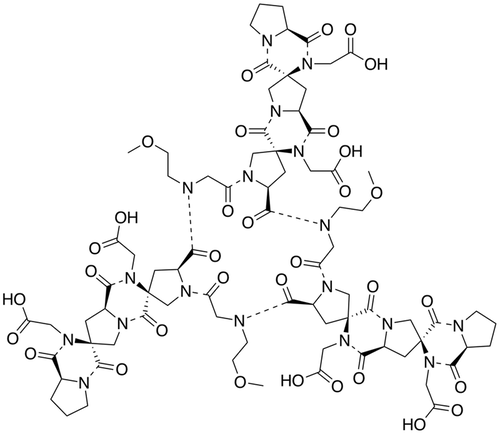

In [1]:
(png-from-file "data/cat-design/trimer.png")

### First we will load the X-ray crystal structure of the Zr-O cluster.

It is surrounded by benzoic acid groups (I don't have the Cambridge Crystallographic Database accession number in hand when I created this demo).

In [50]:
(:= *zr* (load-mol2 "data/cat-design/renamed-zrcluster.mol2"))

*ZR*

#### You can look at the structure and manipulate it using your mouse.

Rotate the molecule by dragging the left mouse button (or trackpad) within the view below.

Zoom (two button drag scroll or scroll wheel).

Pick atoms (hover over an atom and left button click).

At the bottom right corner of the view above is a very small control, drag that to make the view larger or smaller.

Double click with left button to go full screen, hit Escape to return to browser.

In [3]:
(:= *zr-view* (nglv:show-aggregate *zr*)) *zr-view*

A Jupyter Widget

## Load and build 3D coordinates of trimer

In [4]:
(:= *agg* (load-chemdraw-aggregate "data/cat-design/trimer.cdxml"))

*AGG*

In [5]:
(build-hydrogens *agg*)

NIL

In [6]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [51]:
(:= *stereocenters* (stereocenters-sorted-by-name *agg*))

*STEREOCENTERS*

In [52]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

We randomly displace all atoms to assist the energy minimization that we are about to do below.

In [9]:
(jostle *agg* 20)

NIL

In [10]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

In the view above, atoms are randomly jostled in space to break them out of "flatland".

## Below we construct a chemically reasonable structure of the molecule by minimizing the conformation energy. 

This does a lot of things in sequence:

1) Cando automatically assigns atom types.

2) Cando assigns Generalized Amber Force Field (GAFF) parameters.

3) Cando minimizes the energy of the structure, automatically switching between three energy minimizers to take advantage of their different speed/convergence characteristics.

In [11]:
(energy:setup-amber)

SIMPLE-WARNING: 
Warning!  Skipping 10-12 hbond
SIMPLE-WARNING: 
Warning!  Skipping force field atom equivalences


#<FORCE-FIELD >

#### You can ignore the warnings above.

In [53]:
(energy:minimize *agg* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(3.131262).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000              3.131
 minCGnP       0     2  0.001620  51.9            402.739              3.997
 minCGnP       0     3  0.000988  57.6            397.408              3.901
 minCGnP       0     4  0.000932  57.9            392.617              3.344
 minCGnP       0     5  0.001215  61.7            388.043              3.288
 minCGnP       0     6  0.001099  64.3            384.037              3.226
 minCGnP       0     7  0.001291  67.6            379.511              3.376
 minCGnP       0     8  0.001104  70.3            375.264              3.575
 minCGnP       0     9  0.001131  71.4            370.377              3.577
 minCGnP       0    10  0.001312  70.5            364.725    

NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [13]:
(calculate-all-stereochemistry *stereocenters*)

Center: #<ATOM :C_108/:C>  config: S
Center: #<ATOM :C_110/:C>  config: S
Center: #<ATOM :C_133/:C>  config: S
Center: #<ATOM :C_135/:C>  config: S
Center: #<ATOM :C_158/:C>  config: S
Center: #<ATOM :C_227/:C>  config: S
Center: #<ATOM :C_229/:C>  config: S
Center: #<ATOM :C_237/:C>  config: S
Center: #<ATOM :C_239/:C>  config: S
Center: #<ATOM :C_247/:C>  config: S
Center: #<ATOM :C_322/:C>  config: S
Center: #<ATOM :C_324/:C>  config: S
Center: #<ATOM :C_332/:C>  config: S
Center: #<ATOM :C_334/:C>  config: S
Center: #<ATOM :C_342/:C>  config: S


NIL

In [14]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

## Above should be a chemically reasonable three-dimensional structure of the molecule.

In [15]:
(center-on *agg* '(0.0 0.0 15.0))

NIL

In [16]:
(:= *design-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::add-structure *design-view* *cagg*)
*design-view*

A Jupyter Widget

## You can select pairs of carboxylic acid carbons on the ligand and on the benzoic acids of the Zr-O cluster multiple times to build a mapping of atoms on the ligand to the cluster.  It's a bit tricky and takes a couple of tries to get it right.  The function below pulls out the mapping.

In [17]:
(:= *named-map* (named-atom-map *design-view* 6 *agg* *zr*))

SIMPLE-ERROR: 
There aren't enough atoms selected to create a map for 6 pairs.


NIL

#### If you didn't select atoms in the view above then you will have just seen an error - don't worry about it. 
#### I set the *named-map* variable below using a selection I made previously.

In [18]:
(:= *named-map* '((:C_350 . :C_2) (:C_354 . :C_1) 
                  (:C_255 . :C_7) (:C_259 . :C_8)
                  (:C_185 . :C_3) (:C_196 . :C_4)))

*NAMED-MAP*

In [19]:
(cartoon-atom-map *design-view* *named-map* *agg* *zr*)

NIL

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [20]:
(clear-all-atom-restraints *agg*)

NIL

In [21]:
(anchor-named-atom-map *named-map* *agg* *zr*)

NIL

In [22]:
(set-all-stereocenters-to *stereocenters* :S :show t)

C_108  S
C_110  S
C_133  S
C_135  S
C_158  S
C_227  S
C_229  S
C_237  S
C_239  S
C_247  S
C_322  S
C_324  S
C_332  S
C_334  S
C_342  S
15 stereocenters set


NIL

In [23]:
(energy:minimize *agg* :force-field energy::*ff* :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(28.404059).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000             28.404
 minCGnP       0     2  0.000510  37.7          13733.169             21.948
 minCGnP       0     3  0.002827  59.5          13238.768             29.242
 minCGnP       0     4  0.001177  66.9          12894.779             33.259
 minCGnP       0     5  0.000739  57.9          12576.690             36.331
 minCGnP       0     6  0.000795  75.9          12237.518             82.145
 minCGnP       0     7  0.000040   7.5          12204.277             33.863
 minCGnP       0     8  0.000575  31.6          11980.993             18.863
 minCGnP       0     9  0.001407  50.5          11806.149             19.861
 minCGnP       0    10  0.001062  55.9          11665.973   

NIL

In [24]:
(nglv:show-aggregate *agg*)

A Jupyter Widget

### It turns out that the structure above is a bad design - with lots of bad geometry.
# We can rule this design out and move on to another design with a larger macrocycle to better envelop the Zr-O cluster.

### Overlay of the trial above on the Zr-O cluster and looking at it closely can help us learn what is wrong with the design.

In [25]:
(:= *overlay-view* (nglv::show-aggregate *zr*))
(:= *cagg* (make-instance 'nglv::cando-structure :matter *agg*))
(nglv::clear-representations *overlay-view*)
(nglv::add-representation *overlay-view* "hyperball")
(nglv::add-structure *overlay-view* *cagg*)
*overlay-view*

A Jupyter Widget

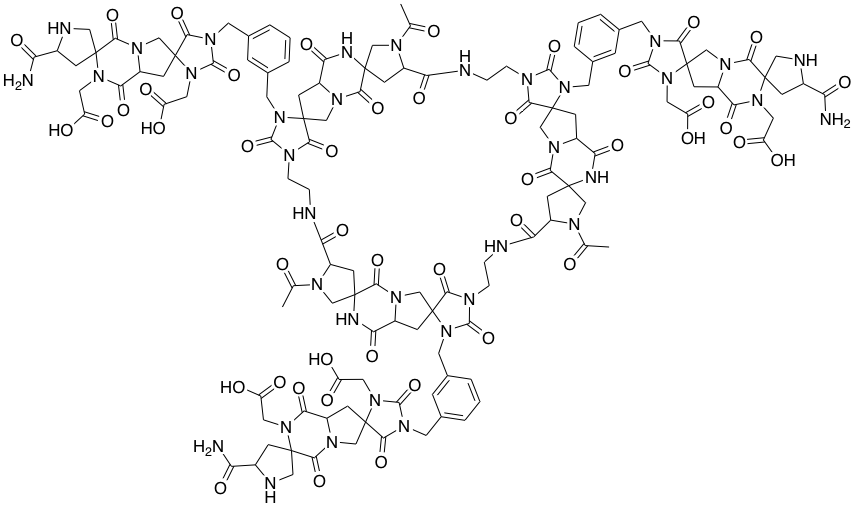

In [27]:
(png-from-file "data/cat-design/trial-catalyst2.png")

In [28]:
(:= *agg2* (load-chemdraw-aggregate "data/cat-design/trial-catalyst2.cdxml"))

*AGG2*

In [29]:
(build-hydrogens *agg2*)

NIL

In [30]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

### The structure above is the Chemdraw structure with no depth.  It illustrates that the Chemdraw structure is loaded successfuly into Cando.

In [31]:
(:= *stereocenters2* (stereocenters-sorted-by-name *agg2*))

*STEREOCENTERS2*

In [32]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


NIL

In [ ]:
(jostle *agg2* 20)

In [34]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

In [37]:
(energy:minimize *agg2* :force-field energy::*ff* 
                 :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(2.575662).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000              2.576
 minCGnP       0     2  0.000832  41.0            410.615              2.237
 minCGnP       0     3  0.001638  59.7            406.371              2.886
 minCGnP       0     4  0.000661  53.9            403.524              1.999
 minCGnP       0     5  0.001090  56.9            401.272              1.799
 minCGnP       0     6  0.000827  59.5            399.887              1.664
 minCGnP       0     7  0.001041  61.4            398.396              1.547
 minCGnP       0     8  0.000882  61.5            397.303              1.361
 minCGnP       0     9  0.001156  64.2            396.195              1.347
 minCGnP       0    10  0.001084  69.1            395.177    

SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2


NIL

### Check that the stereochemistry is maintained - they will all still be 'S' configuration.

In [38]:
(calculate-all-stereochemistry *stereocenters2*)

Center: #<ATOM :C_136/:C>  config: S
Center: #<ATOM :C_153/:C>  config: S
Center: #<ATOM :C_174/:C>  config: S
Center: #<ATOM :C_185/:C>  config: S
Center: #<ATOM :C_2/:C>  config: S
Center: #<ATOM :C_250/:C>  config: S
Center: #<ATOM :C_253/:C>  config: S
Center: #<ATOM :C_257/:C>  config: S
Center: #<ATOM :C_261/:C>  config: S
Center: #<ATOM :C_287/:C>  config: S
Center: #<ATOM :C_293/:C>  config: S
Center: #<ATOM :C_298/:C>  config: S
Center: #<ATOM :C_301/:C>  config: S
Center: #<ATOM :C_36/:C>  config: S
Center: #<ATOM :C_397/:C>  config: S
Center: #<ATOM :C_400/:C>  config: S
Center: #<ATOM :C_404/:C>  config: S
Center: #<ATOM :C_408/:C>  config: S
Center: #<ATOM :C_434/:C>  config: S
Center: #<ATOM :C_440/:C>  config: S
Center: #<ATOM :C_445/:C>  config: S
Center: #<ATOM :C_448/:C>  config: S
Center: #<ATOM :C_50/:C>  config: S
Center: #<ATOM :C_8/:C>  config: S


NIL

In [39]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

In [42]:
(center-on *agg2* '(0.0 0.0 15.0))

NIL

In [43]:
(:= *design-view2* (nglv::show-aggregate *zr*))
(:= *cagg2* (make-instance 'nglv::cando-structure :matter *agg2*))
(nglv::add-structure *design-view2* *cagg2*)
*design-view2*

A Jupyter Widget

In [44]:
(:= *named-map2* (named-atom-map *design-view2* 6 *agg2* *zr*))

SIMPLE-ERROR: 
There aren't enough atoms selected to create a map for 6 pairs.


NIL

In [47]:
(when (boundp '*named-map2*) *named-map2*)

((:C_452 . :C_8) (:C_458 . :C_7) (:C_198 . :C_5) (:C_219 . :C_6)
 (:C_305 . :C_4) (:C_311 . :C_3))

#### If you didn't select atoms in the view above then you will have just seen an error - don't worry about it. 
#### I set the *named-map* variable below using a selection I made previously.

In [48]:
(:= *named-map2* '((:C_452 . :C_8) (:C_458 . :C_7) 
                    (:C_198 . :C_5) (:C_219 . :C_6)
                    (:C_305 . :C_4) (:C_311 . :C_3)))

*NAMED-MAP2*

In [49]:
(cartoon-atom-map *design-view2* *named-map2* *agg2* *zr*)

NIL

## Scroll up and you should see magenta lines joining the pairs of atoms that are mapped on to each other.

### Next we are going to constrain the selected atoms from the trial catalyst to the Zr-O crystal structure.

In [57]:
(clear-all-atom-restraints *agg2*)

NIL

In [58]:
(anchor-named-atom-map *named-map2* *agg2* *zr*)

NIL

In [59]:
(set-all-stereocenters-to *stereocenters2* :S :show t)

C_136  S
C_153  S
C_174  S
C_185  S
C_2    S
C_250  S
C_253  S
C_257  S
C_261  S
C_287  S
C_293  S
C_298  S
C_301  S
C_36   S
C_397  S
C_400  S
C_404  S
C_408  S
C_434  S
C_440  S
C_445  S
C_448  S
C_50   S
C_8    S
24 stereocenters set


NIL

In [60]:
(energy:minimize *agg2* :force-field energy::*ff* :restraints-on t
                 :max-sd-steps 1000
                 :sd-tolerance 5000.0
                 :max-cg-steps 1000)

======= Starting Steepest Descent Minimizer
DONE absolute force test:
forceRmsMag(35.308644).LT.forceTolerance(5000.000000)
======= Starting Conjugate Gradient Minimizer
---Stage-Seconds--Step-----Alpha---Dir-------------Energy-----------RMSforce
 minCGnP       0     1  0.000000   0.0              0.000             35.309
 minCGnP       0     2  0.000890  47.3          31836.952             38.243
 minCGnP       0     3  0.000655  38.2          31277.305             35.053
 minCGnP       0     4  0.000737  46.4          30813.470             28.273
 minCGnP       0     5  0.001188  60.7          30332.991             35.589
 minCGnP       0     6  0.001577  73.3          29279.977             52.557
 minCGnP       0     7  0.000680  60.5          28224.837             57.051
 minCGnP       0     8  0.000701  69.6          27026.693             77.953
 minCGnP       0     9  0.000210  44.6          26734.511             54.295
 minCGnP       0    10  0.000649  43.5          25746.915   

SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :n-:c3-:c2  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2
SIMPLE-WARNING: 
Estimated angle term :c2-:c3-:n  T0 -> 111.760000 degrees K -> 24.451740 kCal/rad^2


NIL

In [61]:
(nglv:show-aggregate *agg2*)

A Jupyter Widget

### This may be a better design.
### It's going to take more work to establish this.
### A build-tree will be constructed and ligands will be restrained to mimic the benzoic acids from the Zr-O cluster.
### 1) Rotatable bonds will be twisted.
### 2) Stereocenters will be flipped.
### 3) Functional groups will be varied.
### While scoring the conformational energy to find an optimal design.

## That's it for now - anything more sophisticated requires setting up more designs and running more sophisticated calculations on super-computers.
## This user interface can drive 100,000s of copies of Cando running on large super-computers.